# EDA
Exploratoy Data Analysis | En este apartado vamos a resumir los datos y "dejar que los datos hablen".

In [44]:
# Importación de librerias

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('dark_background')

In [45]:
df = pd.read_csv('Data/Titanic_check.csv')

In [46]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone
0,0.0,3.0,1,22.000,7.2500,Southampton,1,0
1,1.0,1.0,0,38.000,71.2833,Cheltenham,1,0
2,1.0,3.0,0,26.000,7.9250,Southampton,0,1
3,1.0,1.0,0,35.000,53.1000,Southampton,1,0
4,0.0,3.0,1,25.375,8.0500,Southampton,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   FamilySize  891 non-null    int64  
 7   Alone       891 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 55.8+ KB


## Datos básicos

En este apartado vamos a ver los datos más básicos como % de supervivientes, % de hombres...

In [48]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [49]:
Porcentaje_survived = df['Survived'].sum() / len(df['Survived']) *100

Porcentaje_survived

np.float64(38.38383838383838)

In [50]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [51]:
Porcentaje_sex = df['Sex'].sum() / len(df['Sex']) *100
# 1=Male 0=Female
Porcentaje_sex

np.float64(64.75869809203144)

In [52]:
df['Pclass'].value_counts()

Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64

In [53]:
print('La media es: ', df['Age'].mean())
print('La mediana es: ', df['Age'].median())
print('La moda es: ', df['Age'].mode())

La media es:  29.760578002244667
La mediana es:  29.0
La moda es:  0    29.0
Name: Age, dtype: float64


In [54]:
df['Alone'].value_counts()

Alone
1    537
0    354
Name: count, dtype: int64

In [55]:
Porcentaje_alone = df['Alone'].sum() / len(df['Alone']) *100

Porcentaje_alone

np.float64(60.26936026936027)

## Gráficas

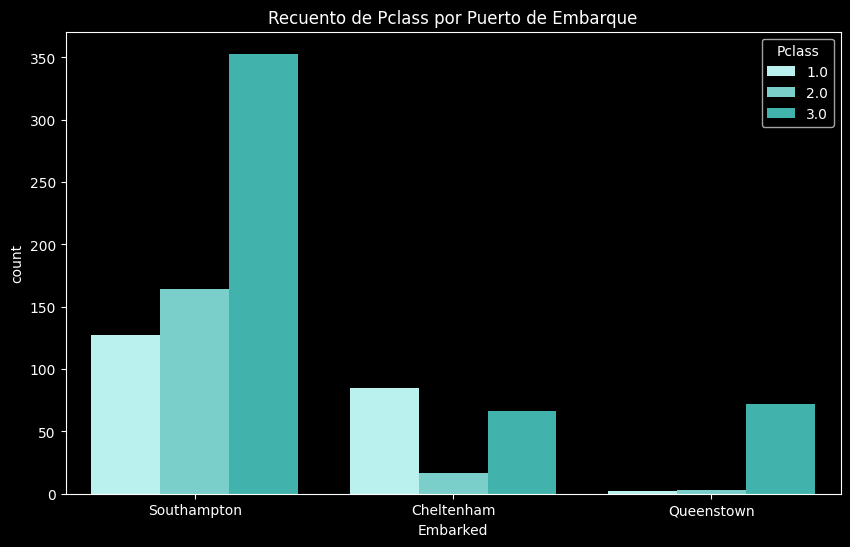

" \nhue_order= ['1.0', '2.0', '3.0']\n"

In [56]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='Embarked',
    hue=df['Pclass'],
    palette=['#B1F9F5', '#6CDDD7', '#2FC5BD']
)

plt.title('Recuento de Pclass por Puerto de Embarque')
plt.savefig('Graphics/Recuento_Pclass_Embarked')
plt.show()

# Código usado antes
''' 
hue_order= ['1.0', '2.0', '3.0']
'''

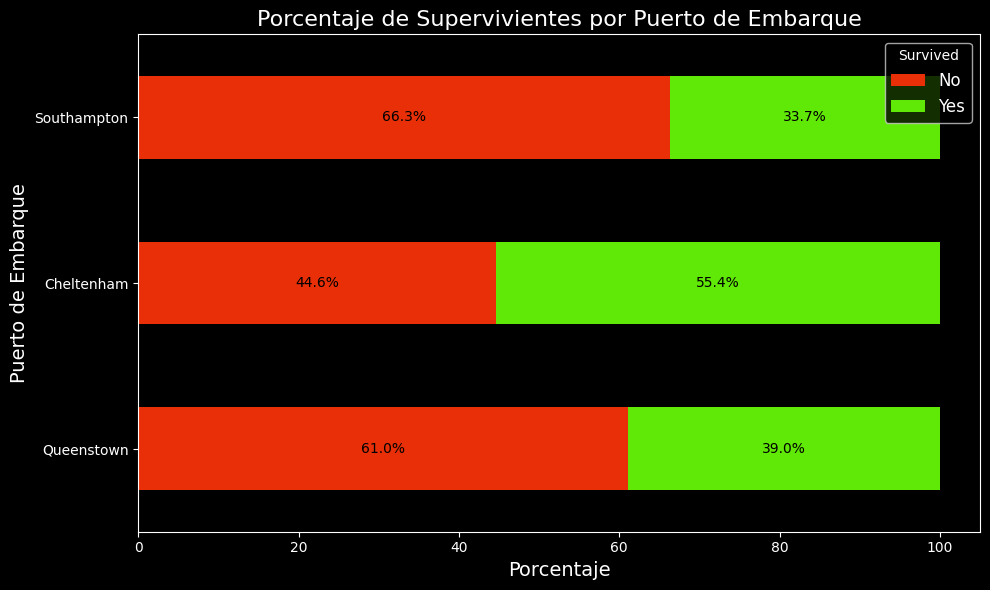

In [57]:
# Calcular los porcentajes
total_por_puerto = df['Embarked'].value_counts()
porcentajes = df.groupby(['Embarked', 'Survived']).size().unstack()
porcentajes = porcentajes.div(total_por_puerto, axis=0) * 100

# Reordenar los índices según el orden deseado
orden_puertos = [ 'Queenstown', 'Cheltenham', 'Southampton']  # Orden deseado
porcentajes = porcentajes.reindex(orden_puertos)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
porcentajes.plot(
        kind='barh',
        stacked=True,
        ax=ax,
        color=['#E82F07', '#60E807'])

# Configurar el título y etiquetas
ax.set_title('Porcentaje de Supervivientes por Puerto de Embarque', fontsize=16)
ax.set_xlabel('Porcentaje', fontsize=14)
ax.set_ylabel('Puerto de Embarque', fontsize=14)
ax.legend(labels=['No', 'Yes'], title='Survived', fontsize=12)

# Añadir etiquetas con los porcentajes
for i, (index, row) in enumerate(porcentajes.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        ax.text(cumulative + value / 2, i, f'{value:.1f}%', 
                va='center', ha='center', fontsize=10, color='black' if value > 5 else 'black')
        cumulative += value

plt.tight_layout()
plt.savefig('Graphics/Supervivientes_Embaque')
plt.show()


In [58]:
datos_pclass = {
    'Class': ['Class 1', 'Class 2', 'Class 3'],
    'Cantidad': [
        sum(1 for _ in df['Pclass'] if _ == 1),
        sum(1 for _ in df['Pclass'] if _ == 2),
        sum(1 for _ in df['Pclass'] if _ == 3)
    ]
}

fig = px.pie(
    datos_pclass,
    values='Cantidad',
    names='Class',
    title='Distribución de Pclass',
    color=['#E82F07', '#60E807', '#070EE8']    
)

# Personalizar diseño y tamaño de letras
fig.update_layout(
    template='plotly_dark',
    font=dict(size=20),  # Tamaño general de fuente
)

fig.update_traces(textinfo='label+percent') 
fig.show()
fig.write_html('Graphics/pie_Pclass.html')


/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_8152/1888976874.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_8152/1888976874.py:3: UserWarning:


The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.



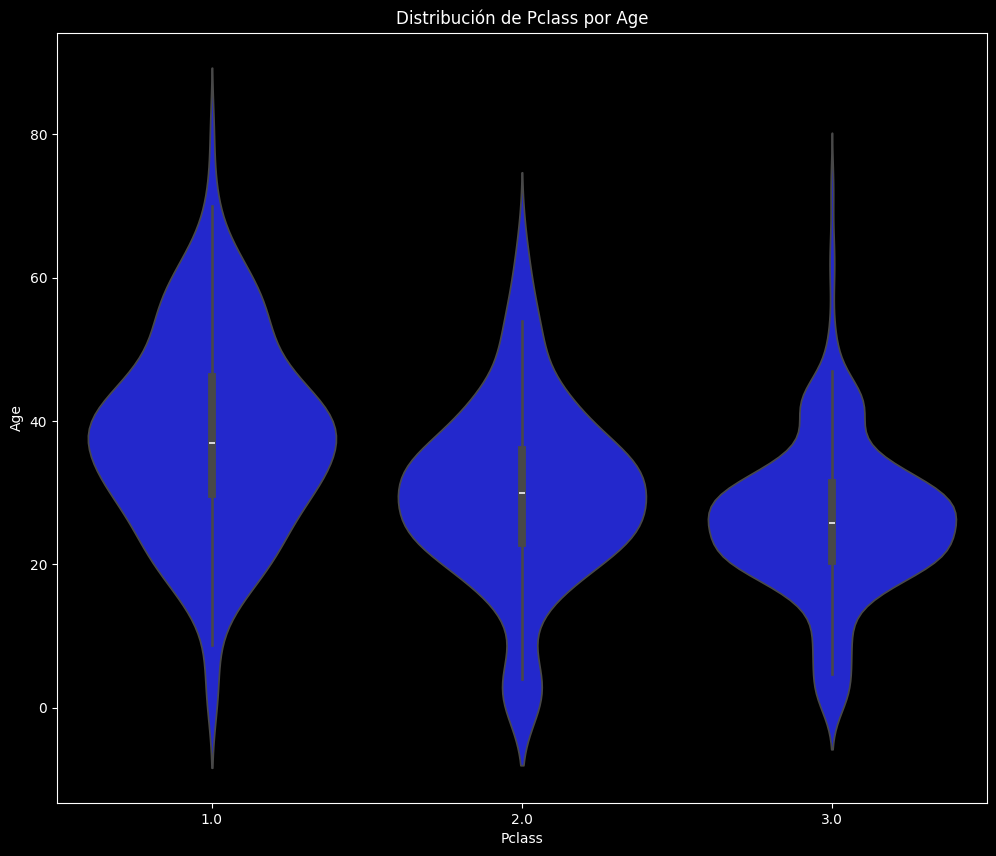

In [59]:
plt.figure(figsize=(12, 10))

sns.violinplot(
    data=df,
    x='Pclass',
    y='Age', 
    palette= ['#070EE8'],
    order=[1.0, 2.0, 3.0]  # Orden deseado para las clases
)

plt.title('Distribución de Pclass por Age')
plt.savefig('Graphics/Violin_Pclass_Age.png')
plt.show()

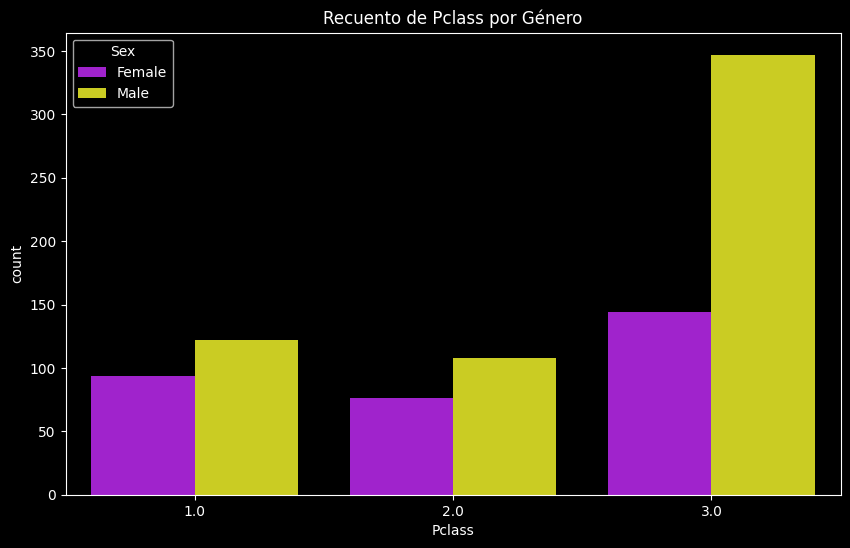

In [60]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='Pclass',
    hue=df['Sex'].map({0: 'Female', 1: 'Male'}),
    palette=['#AE07E8', '#E5E807']
)

plt.title('Recuento de Pclass por Género')
plt.savefig('Graphics/Recuento_Clase_Genero')
plt.show()

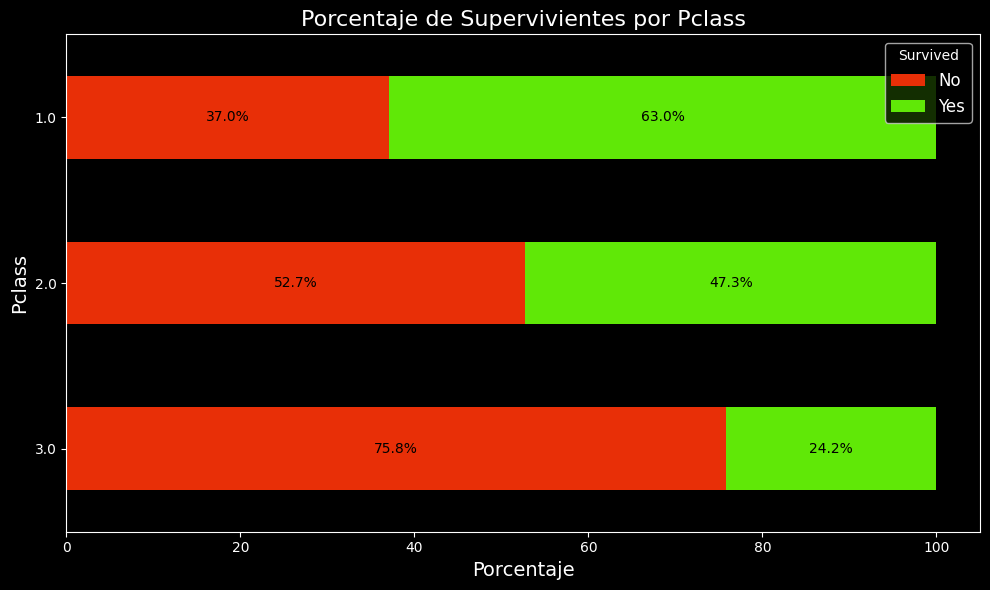

In [61]:
# Calcular los porcentajes
total_por_puerto = df['Pclass'].value_counts()
porcentajes = df.groupby(['Pclass', 'Survived']).size().unstack()
porcentajes = porcentajes.div(total_por_puerto, axis=0) * 100

# Reordenar los índices según el orden deseado
orden_puertos = [ 3.0, 2.0, 1.0]  # Orden deseado
porcentajes = porcentajes.reindex(orden_puertos)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
porcentajes.plot(
        kind='barh',
        stacked=True,
        ax=ax,
        color=['#E82F07', '#60E807'])

# Configurar el título y etiquetas
ax.set_title('Porcentaje de Supervivientes por Pclass', fontsize=16)
ax.set_xlabel('Porcentaje', fontsize=14)
ax.set_ylabel('Pclass', fontsize=14)
ax.legend(labels=['No', 'Yes'], title='Survived', fontsize=12)

# Añadir etiquetas con los porcentajes
for i, (index, row) in enumerate(porcentajes.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        ax.text(cumulative + value / 2, i, f'{value:.1f}%', 
                va='center', ha='center', fontsize=10, color='black' if value > 5 else 'black')
        cumulative += value

plt.tight_layout()
plt.savefig('Graphics/Supervivientes_Pclass')
plt.show()


In [62]:
df['Pclass'] = df['Pclass'].astype(str) # La trato como una categoría

fig = px.scatter(
    df,
    x='Age',
    y='Fare',
    color='Pclass',
    title='Relación Fare vs. Age y Pclass',
    color_discrete_sequence=['#E82F07', '#60E807', '#070EE8'],
    category_orders={"Pclass": ['1.0', '2.0', '3.0']}  # Ordenar Pclass
)
fig.update_yaxes(range=[0, 300]) # Limitat eje Y a 300
fig.update_layout(template='plotly_dark')
fig.write_html('Graphics/scatter_fare_age_Pclass_2_300.html')
fig.show()

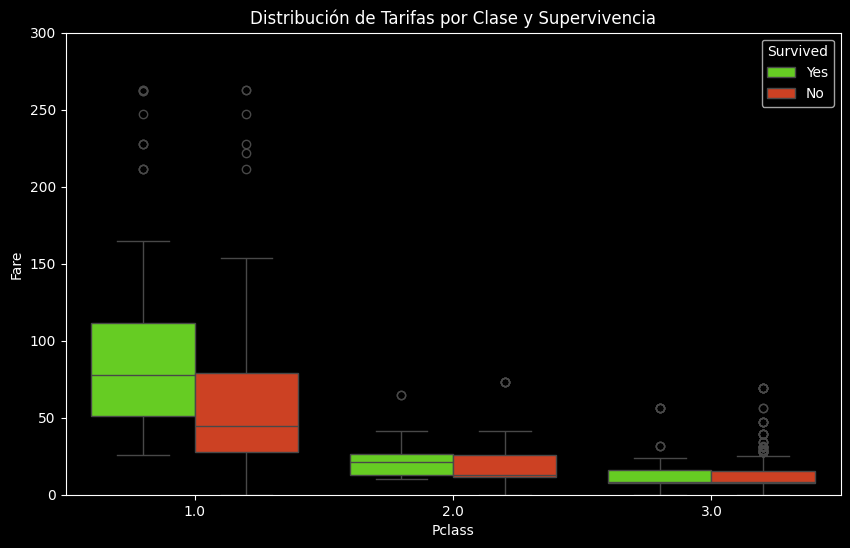

In [63]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='Pclass',
    y='Fare',
    hue=df['Survived'].map({0: 'No', 1: 'Yes'}),
    palette=['#60E807', '#E82F07'],
    order=[1.0, 2.0, 3.0],
    hue_order=['Yes', 'No']
    )

plt.ylim(0, 300)  # Limitar el eje Y a 300
plt.title('Distribución de Tarifas por Clase y Supervivencia')
plt.savefig('Graphics/Distribucion_Fare_Class_Survived')
plt.show()

## More graphics

Not used at the end, but interesting to take a look. Some of them are repeated but with different dispositions.

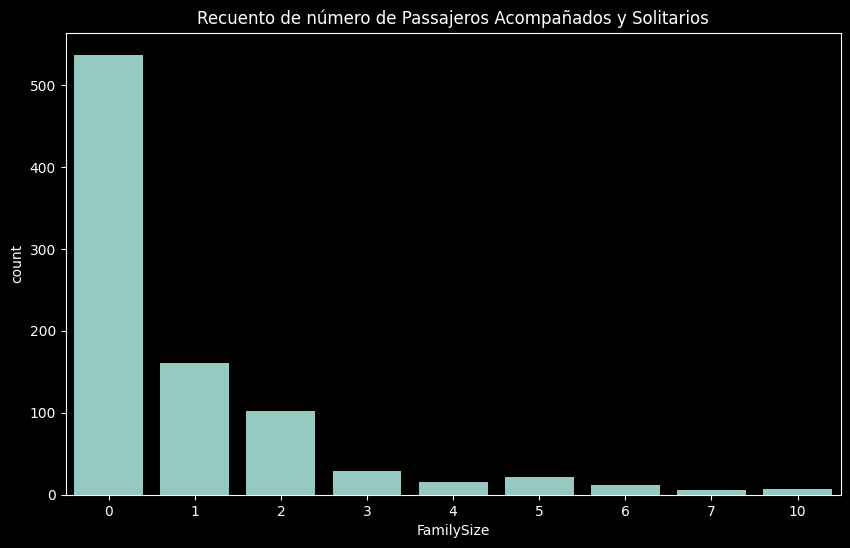

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize')
plt.title('Recuento de número de Passajeros Acompañados y Solitarios')
plt.savefig('Graphics/00Recuento_Familia_Alone')
plt.show()

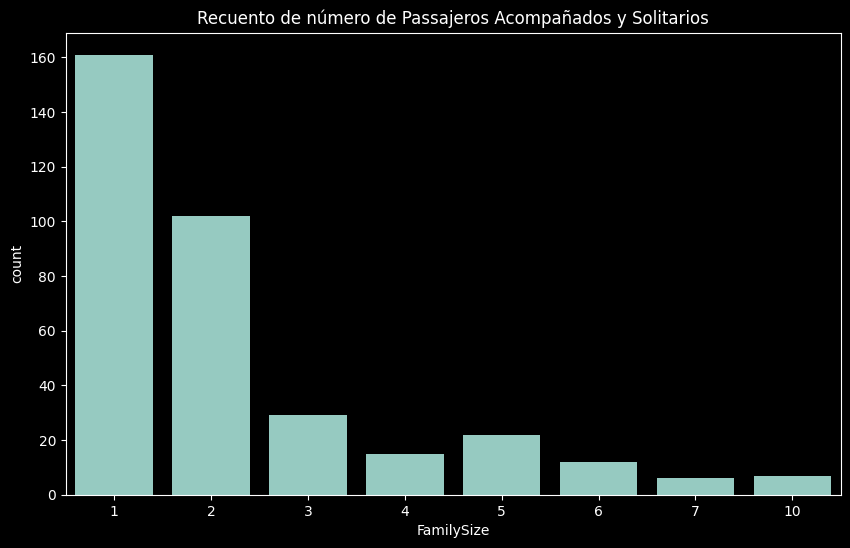

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='FamilySize')
plt.title('Recuento de número de Passajeros Acompañados y Solitarios')
plt.savefig('Graphics/00Recuento_Familia')
plt.show()

In [66]:
datos_family = {
    'Family': ['1', '2', '3', '4', '5', '6', '7', '10'],
    'Cantidad': [
        sum(1 for _ in df['FamilySize'] if _ == 1),
        sum(1 for _ in df['FamilySize'] if _ == 2),
        sum(1 for _ in df['FamilySize'] if _ == 3),
        sum(1 for _ in df['FamilySize'] if _ == 4),
        sum(1 for _ in df['FamilySize'] if _ == 5),
        sum(1 for _ in df['FamilySize'] if _ == 6),
        sum(1 for _ in df['FamilySize'] if _ == 7),
        sum(1 for _ in df['FamilySize'] if _ == 10)
    ]
}

fig = px.pie(
    datos_family,
    values='Cantidad',
    names='Family',
    title='Distribución de Family',
    #color=['#E82F07', '#60E807', '#070EE8']    
)

# Personalizar diseño y tamaño de letras
fig.update_layout(
    template='plotly_dark',
    font=dict(size=12),  # Tamaño general de fuente
)

fig.update_traces(textinfo='label+percent') 
fig.show()
fig.write_html('Graphics/00pie_Family.html')

In [67]:
df['Pclass'] = df['Pclass'].astype(str) # La trato como una categoría

fig = px.scatter(
    df,
    x='FamilySize',
    y='Fare',
    color='Pclass',
    title='Relación Fare vs. FamilySize y Pclass',
    color_discrete_sequence=['#E82F07', '#60E807', '#070EE8'],
    category_orders={"Pclass": ['1.0', '2.0', '3.0']}  # Ordenar Pclass
)

fig.update_yaxes(range=[0, 300]) # Limitat eje Y a 300
fig.update_layout(template='plotly_dark')
fig.write_html('Graphics/00scatter_fare_familysize_Pclass_2_300.html')
fig.show()

Para viajeros con familia ('FamilySize'), modificamos el DF para no tener en cuenta los valores 0, que son los pasajeros que viajan individuales. 

In [68]:
df_filtered = df[df['FamilySize'] != 0]

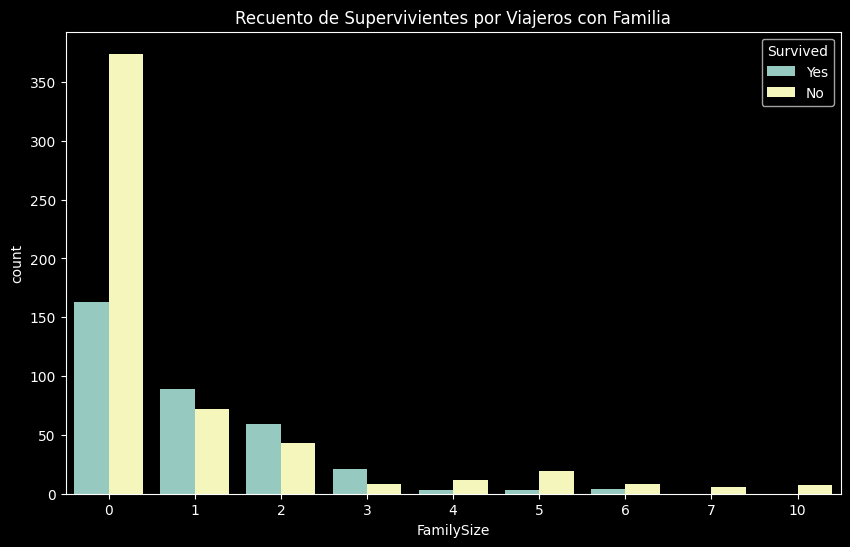

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize', hue=df['Survived'].map({0: 'No', 1: 'Yes'}))
plt.title('Recuento de Supervivientes por Viajeros con Familia')
plt.savefig('Graphics/00Supervivientes_FamilySize')
plt.show()

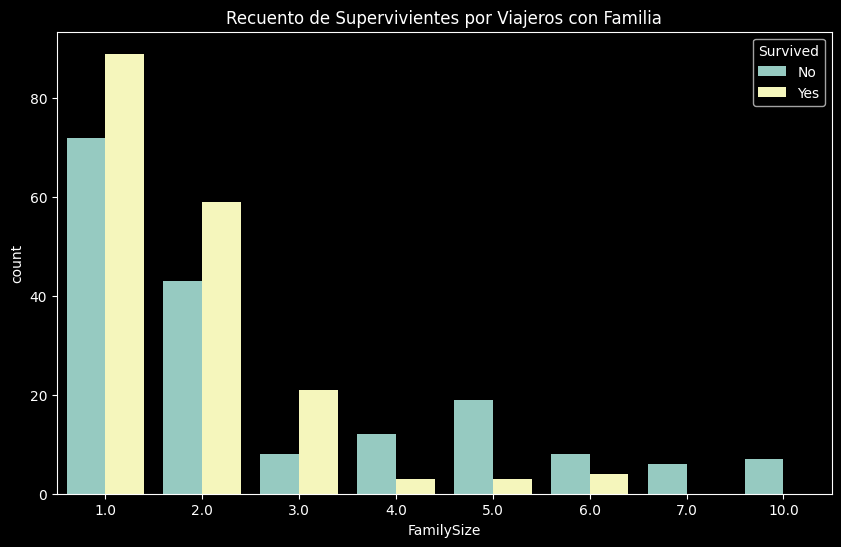

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='FamilySize', hue=df['Survived'].map({0: 'No', 1: 'Yes'}))
plt.title('Recuento de Supervivientes por Viajeros con Familia')
plt.savefig('Graphics/00Supervivientes_FamilySize')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


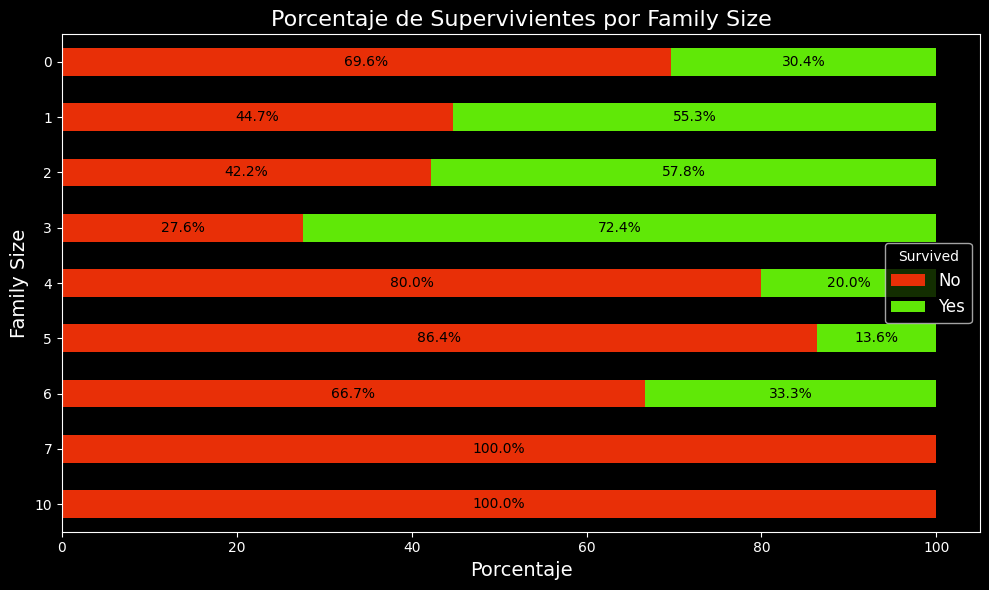

In [71]:
# Calcular los porcentajes
total_por_puerto = df['FamilySize'].value_counts()
porcentajes = df.groupby(['FamilySize', 'Survived']).size().unstack()
porcentajes = porcentajes.div(total_por_puerto, axis=0) * 100

# Reordenar los índices según el orden deseado
orden_puertos = [ 10, 7, 6, 5, 4, 3, 2, 1, 0]  # Orden deseado
porcentajes = porcentajes.reindex(orden_puertos)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
porcentajes.plot(
        kind='barh',
        stacked=True,
        ax=ax,
        color=['#E82F07', '#60E807'])

# Configurar el título y etiquetas
ax.set_title('Porcentaje de Supervivientes por Family Size', fontsize=16)
ax.set_xlabel('Porcentaje', fontsize=14)
ax.set_ylabel('Family Size', fontsize=14)
ax.legend(labels=['No', 'Yes'], title='Survived', fontsize=12)

# Añadir etiquetas con los porcentajes
for i, (index, row) in enumerate(porcentajes.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        ax.text(cumulative + value / 2, i, f'{value:.1f}%', 
                va='center', ha='center', fontsize=10, color='black' if value > 5 else 'black')
        cumulative += value

plt.tight_layout()
plt.savefig('Graphics/00Supervivientes_Family')
plt.show()

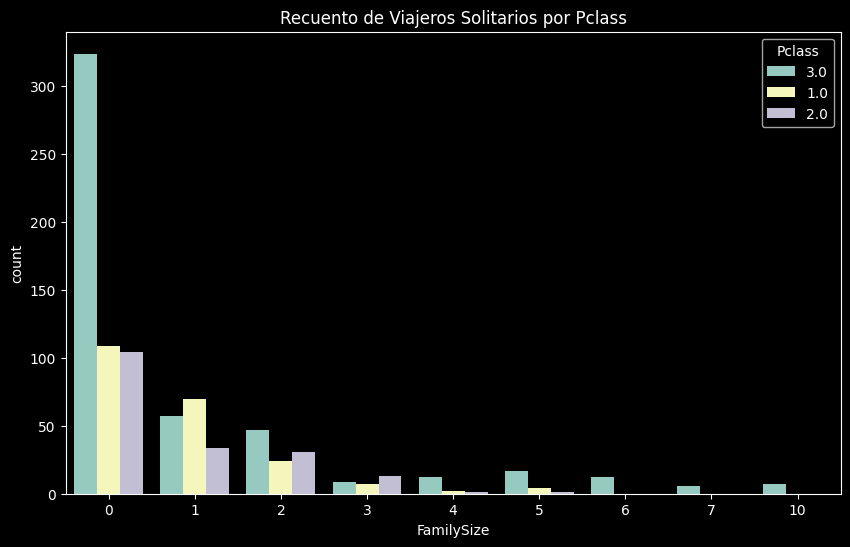

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize', hue=df['Pclass'])
plt.title('Recuento de Viajeros Solitarios por Pclass')
plt.savefig('Graphics/00Alone_Pclass')
plt.show()

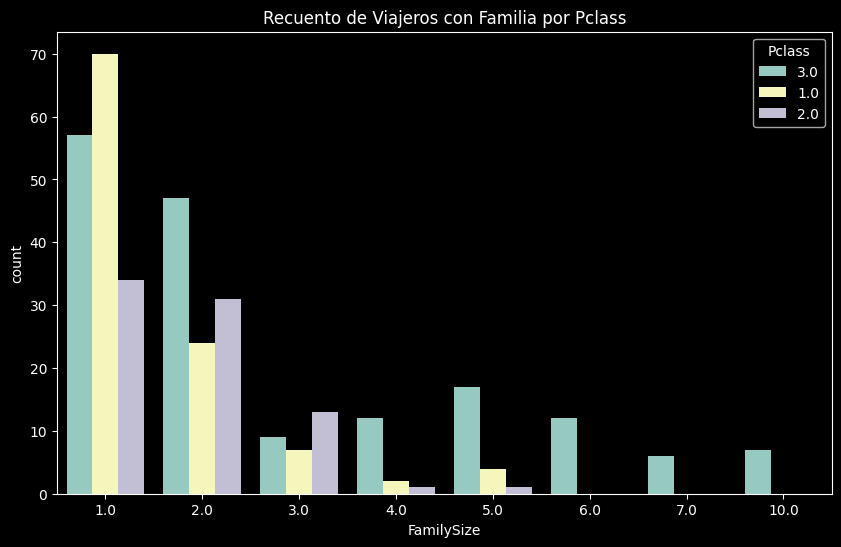

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='FamilySize', hue=df['Pclass'])
plt.title('Recuento de Viajeros con Familia por Pclass')
plt.savefig('Graphics/00FamilySize_Pclass')
plt.show()

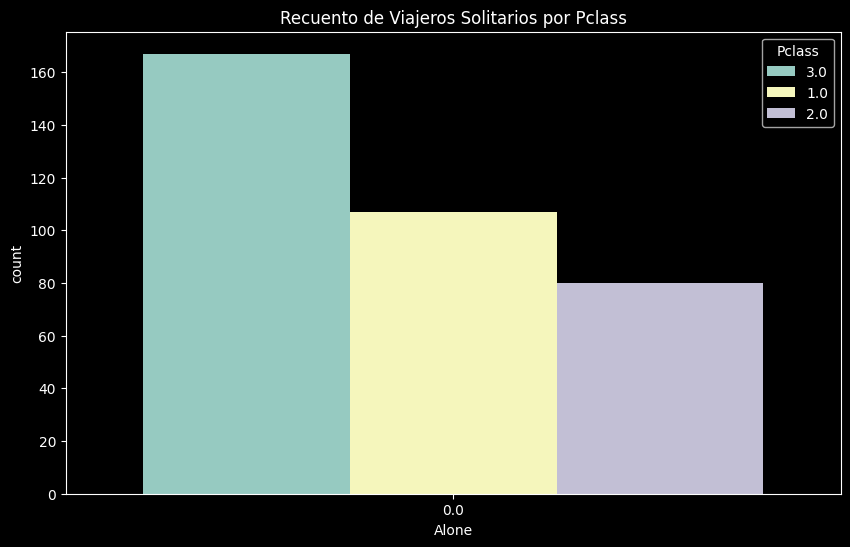

In [74]:
#REVISAR

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Alone', hue=df['Pclass'])
plt.title('Recuento de Viajeros Solitarios por Pclass')
#plt.savefig('Graphics/Alone_Pclass')
plt.show()

## Other graphics not in use

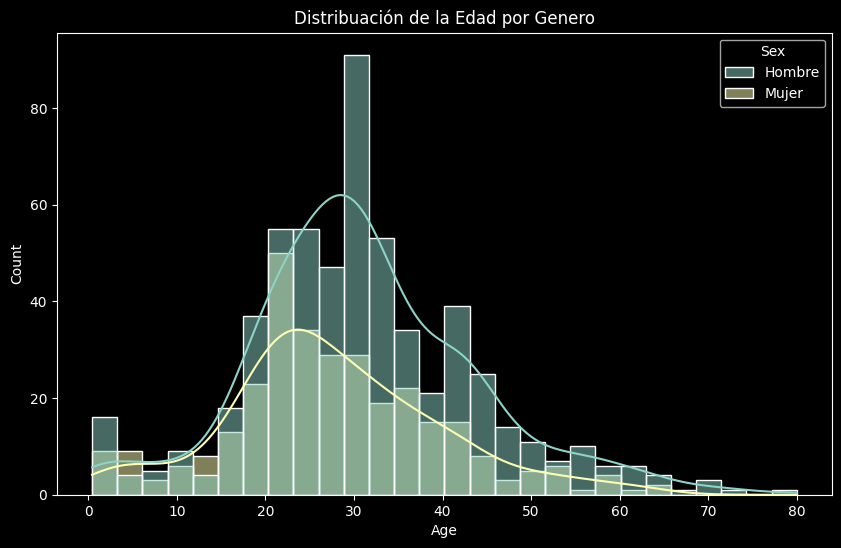

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, hue=df['Sex'].map({0: 'Mujer', 1: 'Hombre'}))
plt.title('Distribuación de la Edad por Genero')
#plt.savefig('Graphics/Distribución_Edad_Genero')
plt.show()

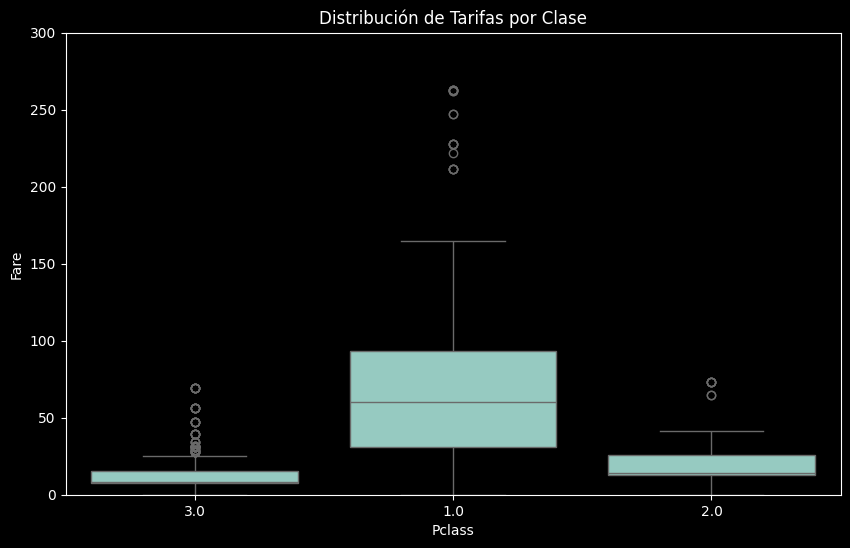

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.ylim(0, 300)  # Limito la Y a 300 para que se pueda leer mejor el gráfico
plt.title('Distribución de Tarifas por Clase')
#plt.savefig('Graphics/Distribucion_Fare_Class')
plt.show()

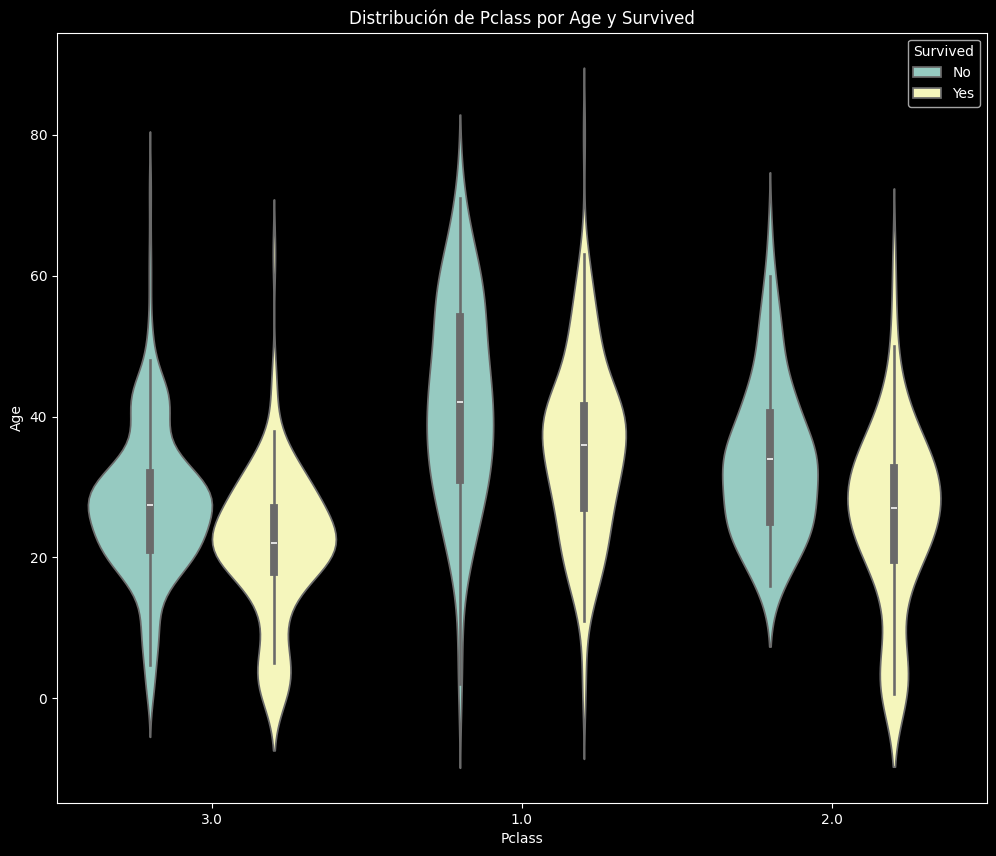

In [77]:
plt.figure(figsize=(12, 10))
sns.violinplot(data=df, x='Pclass', y='Age', hue=df['Survived'].map({0: 'No', 1: 'Yes'}))
plt.title('Distribución de Pclass por Age y Survived')
#plt.savefig('Graphics/Violin_Pclass_Age_Survived.png')
plt.show()

In [78]:

fig = px.scatter(df, x='Age', y='Pclass', color='Survived', title='Relación Fare vs. Age y Pclass')
fig.update_layout(template='plotly_dark')
#fig.write_html('Graphics/scatter_fare_age_Pclass')
fig.show()

In [79]:
fig = px.scatter(df, x='Age', y='Fare', color='Pclass', title='Relación Fare vs. Age y Pclass')
fig.update_yaxes(range=[0, 300]) # limit axis y to 300 for better view
fig.update_layout(template='plotly_dark')
#fig.write_html('Graphics/scatter_fare_age_Pclass_2_300.html')
fig.show()

In [80]:
fig = px.scatter(df, x='Pclass', y='FamilySize', size='Fare', color='Fare', title='Burbujas de FamySize vs. Pclass por Fare')
fig.update_layout(template='plotly_dark')
#fig.write_html('Graphics/bubble_FamilySize_Age_Fare.html')
fig.show()

In [81]:
fig = px.scatter(df, x='Fare', y='Age', color='Pclass', title='Relación Fare vs. Age y Pclass')
fig.update_xaxes(range=[0, 300]) # limit axis x to 300 for better view
fig.update_layout(template='plotly_dark')
#fig.write_html('Graphics/scatter_fare_age_Pclass_300.html')
fig.show()

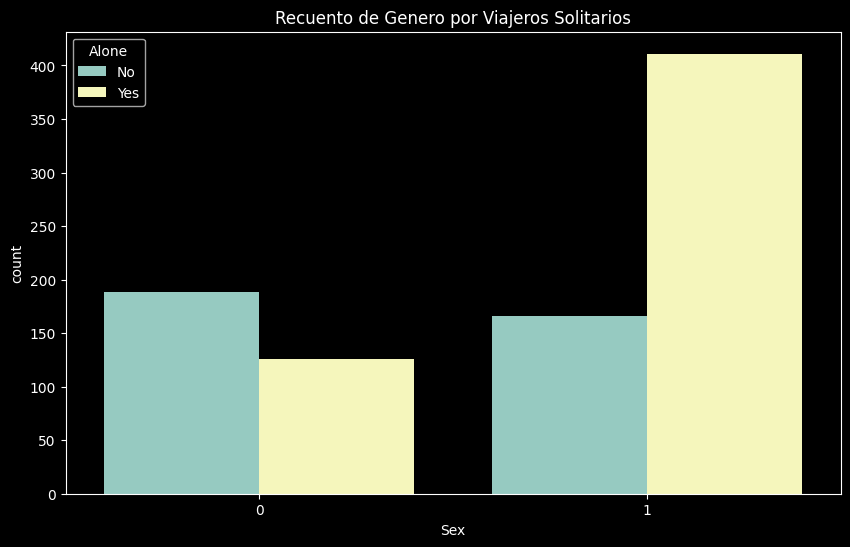

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue=df['Alone'].map({0: 'No', 1: 'Yes'}))
plt.title('Recuento de Genero por Viajeros Solitarios')
#plt.savefig('Graphics/Supervivientes_Alone')
plt.show()

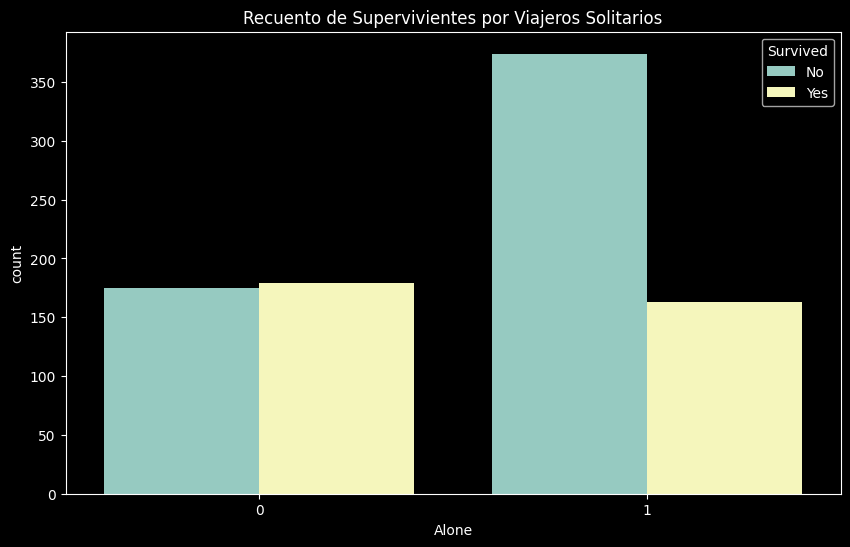

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Alone', hue=df['Survived'].map({0: 'No', 1: 'Yes'}))
plt.title('Recuento de Supervivientes por Viajeros Solitarios')
#plt.savefig('Graphics/Supervivientes_Alone')
plt.show()

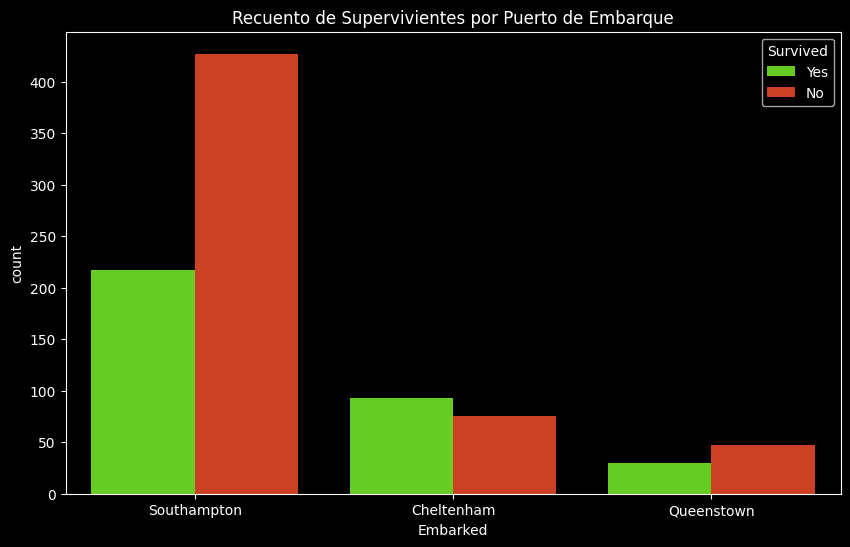

In [84]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df, 
    x='Embarked', 
    hue=df['Survived'].map({0: 'No', 1: 'Yes'}), 
    palette=['#60E807', '#E82F07'],
    hue_order=['Yes', 'No']
)

plt.title('Recuento de Supervivientes por Puerto de Embarque')
#plt.savefig('Graphics/Supervivientes_Embaque')
plt.show()

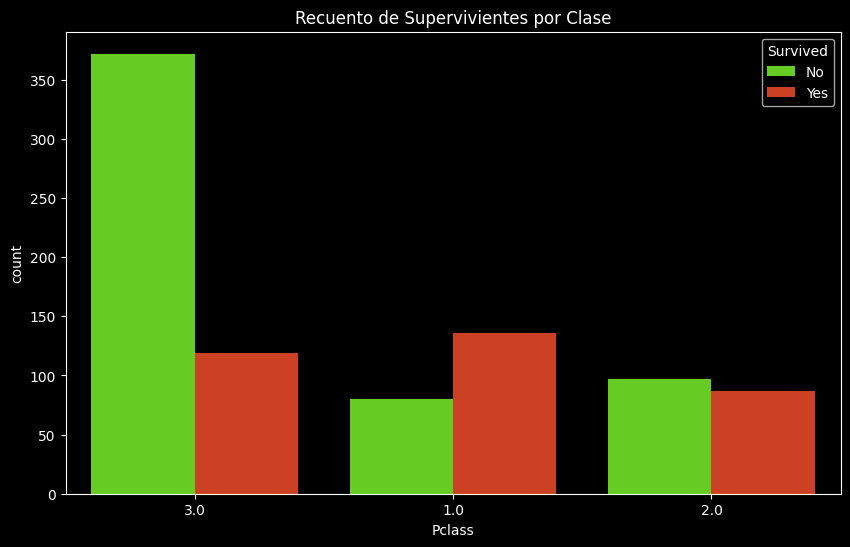

In [85]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='Pclass',
    hue=df['Survived'].map({0: 'No', 1: 'Yes'}),
    palette=['#60E807', '#E82F07']
)

plt.title('Recuento de Supervivientes por Clase')
#plt.savefig('Graphics/Supervivientes_Clase')
plt.show()

In [86]:
fig = px.scatter(df, x='Fare', y='Pclass', color='Survived', title='Relación Monto vs. Duración')
fig.update_layout(template='plotly_dark')
#fig.write_html(f"{carpeta_graficas}/scatter_monto_duracion.html")
fig.show()

In [87]:
fig = px.scatter(df_filtered, x='FamilySize', y='Pclass', color='Survived', title='Relación Fare vs. Age y Pclass')
fig.update_layout(template='plotly_dark')
#fig.write_html('Graphics/00scatter_fare_age_Pclass_300.html')
fig.show()